In [1]:
# Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA as sk_pca
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import keras
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [2]:

def snv(input_data):
  
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
 
        # Apply correction
        output_data[i,:] = (input_data[i,:] - np.mean(input_data[i,:])) / np.std(input_data[i,:])
        #print(output_data)
    return output_data

In [3]:
# load the dataset
data = pd.read_csv('/content/Acetaminophen_mixture_CNN_Binary.csv', index_col=0)
data = pd.DataFrame(data)
df = pd.DataFrame()
data.drop(['label_name'], axis=1, inplace=True)
data.rename(columns={'Unnamed: 0': 'id'},inplace=True)
y = data['label']
X = data.drop(['label'],axis=1)
X = X.values[:,0:]
X = snv(X)
X = pd.DataFrame(X)
print((X.shape))
#X = X.values.reshape(900,32,32)
for i in range(227,1024,1):
  X.insert(loc=i, column=i, value=0)
print((X.shape))

(900, 227)
(900, 1024)


(32, 32)


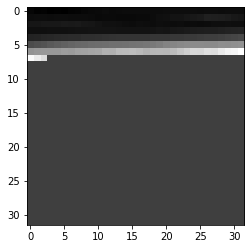

In [4]:
plot = X.values.reshape(900,32,32)
sample_plot =plot[0]
print(sample_plot.shape)
plt.imshow(sample_plot,cmap='gray')
plt.show()

In [5]:
# fit the keras model on the dataset
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

X_train = X_train.values.reshape(X_train.shape[0],32,32,1).astype('float32')
X_test= X_test.values.reshape(X_test.shape[0],32,32,1).astype('float32')
print(X_train.shape)

(720, 32, 32, 1)


In [6]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    #monitor='val_accuracy', 
    monitor='loss',
    patience=0, 
    #min_delta=0.001, 
    mode='max'
)
n_timesteps = X_train.shape[1] 
n_features  = X_train.shape[2]  
#model = keras.Sequential(name="model_conv2D")
#model.add(keras.layers.Input(shape=(n_timesteps,n_features,1)))
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
model.add(keras.layers.AveragePooling2D())

model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.AveragePooling2D())

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=256, activation='relu'))

model.add(keras.layers.Dense(units=84, activation='relu'))

model.add(keras.layers.Dense(units=1, activation = 'relu'))

model.compile(loss='mse', optimizer='adam', metrics='mse')

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d (AveragePo (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               147712    
_________________________________________________________________
dense_1 (Dense)              (None, 84)                2

In [8]:
history = model.fit(X_train, y_train, epochs=20,verbose=1)

Epoch 1/20
23/23 [==============================] - 1s 18ms/step - loss: 0.1705 - mse: 0.1705
Epoch 2/20
23/23 [==============================] - 0s 16ms/step - loss: 0.1287 - mse: 0.1287
Epoch 3/20
23/23 [==============================] - 0s 17ms/step - loss: 0.0596 - mse: 0.0596
Epoch 4/20
23/23 [==============================] - 0s 17ms/step - loss: 0.0127 - mse: 0.0127
Epoch 5/20
23/23 [==============================] - 0s 17ms/step - loss: 0.0080 - mse: 0.0080
Epoch 6/20
23/23 [==============================] - 0s 17ms/step - loss: 0.0069 - mse: 0.0069
Epoch 7/20
23/23 [==============================] - 0s 17ms/step - loss: 0.0071 - mse: 0.0071
Epoch 8/20
23/23 [==============================] - 0s 17ms/step - loss: 0.0061 - mse: 0.0061
Epoch 9/20
23/23 [==============================] - 0s 17ms/step - loss: 0.0053 - mse: 0.0053
Epoch 10/20
23/23 [==============================] - 0s 18ms/step - loss: 0.0051 - mse: 0.0051
Epoch 11/20
23/23 [==============================] - 0s 17m

In [9]:
mse = model.evaluate(X_test, y_test)
print('Accuracy: %.2f',mse)
#print(history.history['mse'])


6/6 [==============================] - 0s 9ms/step - loss: 0.0028 - mse: 0.0028
Accuracy: %.2f [0.0028382556047290564, 0.0028382556047290564]


In [10]:
myst = pd.read_csv('/content/Mystery_testing_data.csv', index_col=0)
myst = pd.DataFrame(myst)
predictions =[]
myst_predictions = pd.DataFrame(myst["label_name"])
myst.drop(['label_name'], axis=1, inplace=True)
# Applying SNV to myst data
myst = myst.values[:,0:]
myst = snv(myst)
myst = pd.DataFrame(myst)
for i in range(227,1024,1):
  myst.insert(loc=i, column=i, value=0)
print((X.shape))
myst= myst.values.reshape(myst.shape[0],32,32,1).astype('float32')
preds = model.predict(myst)
print(preds)
se = pd.Series(preds.tolist())
#print(se.values)
#myst_predictions.insert(loc=0, column='predictions', value=[sum(se.values)/len(se.values)])
#myst_predictions.insert(loc=1, column='predictions', value=se.values)
for i in range(0, 100):
  #myst_predictions.insert(loc=1, column='molar_mass', value=se[i].values)
  predictions.append((sum(se[i])/len(se[i])))
#print(myst_predictions)
myst_predictions.insert(loc=1, column='predictions', value=predictions)

#myst['class_label'] = [1 if x > 0.5 else 0 for x in myst['predictions']]
#myst_predictions.insert(loc=2, column='Class Name', value=se.values)

myst_predictions.to_csv('/content/Mystery_Prediction_2DCNN_data_binary.csv')

(900, 1024)
[[0.9511771 ]
 [0.9406878 ]
 [0.935905  ]
 [0.94680333]
 [0.94925463]
 [0.9429027 ]
 [0.93497944]
 [0.9429257 ]
 [0.9433913 ]
 [0.94524586]
 [0.9933778 ]
 [1.0074229 ]
 [1.0140865 ]
 [0.9985409 ]
 [1.0144467 ]
 [1.0109715 ]
 [1.0007465 ]
 [0.9920665 ]
 [1.0037289 ]
 [1.009953  ]
 [0.4480321 ]
 [0.46672615]
 [0.44449475]
 [0.45786336]
 [0.44009173]
 [0.47045094]
 [0.44077787]
 [0.44242617]
 [0.37225136]
 [0.46521375]
 [0.87158346]
 [0.8672373 ]
 [0.86547196]
 [0.87319946]
 [0.89684725]
 [0.8686224 ]
 [0.8668562 ]
 [0.86537945]
 [0.8538511 ]
 [0.88080955]
 [0.6076791 ]
 [0.47913572]
 [0.41770142]
 [0.50455976]
 [0.41533968]
 [0.53512716]
 [0.5663179 ]
 [0.479158  ]
 [0.49949157]
 [0.48742995]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.10169134]
 [0.06557798]
 [0.09991204]
 [0.12055127]
 [0.12512739]
 [0.08037375]
 [0.07035696]
 [0.10515112]
 [0.08813499]
 [0.16965999]
 [0.8953

In [11]:
#Predicting Ternary Samples Data
data = pd.read_csv('/content/ternary_samples.csv', index_col=0)
data = pd.DataFrame(data)
ternary_predictions = pd.DataFrame()

ternary_predictions["label_name"] =data["label_name"]
ternary_predictions['Actual'] = data['label']

data.drop(['label_name'], axis=1, inplace=True)
data.rename(columns={'Unnamed: 0': 'id'},inplace=True)

y = data['label']
X = data.drop(['label'],axis=1)
X = X.values[:,0:]
X = snv(X)
X = pd.DataFrame(X)

for i in range(227,1024,1):
  X.insert(loc=i, column=i, value=0)


ternary= X.values.reshape(X.shape[0],32,32,1).astype('float32')
preds = model.predict(ternary)
print(preds)
se = pd.Series(preds.tolist())
ternary_predictions.insert(loc=0, column='predictions', value=se.values)
#Saving results
ternary_predictions.to_csv('/content/Ternary_Prediction_2DCNN.csv')

[[0.35595468]
 [0.45359257]
 [0.2991018 ]
 [0.34084255]
 [0.27578017]
 [0.22594401]
 [0.26117185]
 [0.35836825]
 [0.31483218]
 [0.23091239]
 [0.3598692 ]
 [0.34147355]
 [0.40077883]
 [0.2303319 ]
 [0.35306588]
 [0.4110031 ]
 [0.34197223]
 [0.3452341 ]
 [0.33825058]
 [0.42582604]
 [0.33403394]
 [0.26280707]
 [0.3278751 ]
 [0.3838348 ]
 [0.36603695]
 [0.2832307 ]
 [0.2943126 ]
 [0.25592685]
 [0.18405074]
 [0.43165353]
 [0.26019445]
 [0.3637209 ]
 [0.3227596 ]
 [0.4012603 ]
 [0.38789532]
 [0.29211777]
 [0.35496622]
 [0.3087359 ]
 [0.25255027]
 [0.3437399 ]
 [0.3477753 ]
 [0.414182  ]
 [0.3822817 ]
 [0.24343136]
 [0.24613693]
 [0.4161015 ]
 [0.3151657 ]
 [0.3883385 ]
 [0.30791834]
 [0.25470966]
 [0.35799092]
 [0.3832192 ]
 [0.33371505]
 [0.38750702]
 [0.313763  ]
 [0.30778208]
 [0.39725634]
 [0.27454203]
 [0.32016313]
 [0.4618866 ]
 [0.37041807]
 [0.28813815]
 [0.36043534]
 [0.40985635]
 [0.35571375]
 [0.41107494]
 [0.25556463]
 [0.253279  ]
 [0.30610833]
 [0.2351217 ]
 [0.3723998 ]
 [0.44

In [12]:
#Predicting Tylenol Data
data = pd.read_csv('tylenol_topcare_samples.csv', index_col=0)
data = pd.DataFrame(data)
ternary_predictions = pd.DataFrame()

ternary_predictions["label_name"] =data["label_name"]


data.drop(['label_name'], axis=1, inplace=True)
data.rename(columns={'Unnamed: 0': 'id'},inplace=True)

X = data.values[:,0:]
X = snv(X)
X = pd.DataFrame(X)

for i in range(227,1024,1):
  X.insert(loc=i, column=i, value=0)

ternary= X.values.reshape(X.shape[0],32,32,1).astype('float32')
preds = model.predict(ternary)
print (preds)

se = pd.Series(preds.tolist())
ternary_predictions.insert(loc=0, column='predictions', value=se.values)
#Saving results
ternary_predictions.to_csv('/content/Tylenol_Prediction_LeNet_2DCNN.csv')

[[0.09856251]
 [0.15627146]
 [0.14463487]
 ...
 [0.43873516]
 [0.45488247]
 [0.42457384]]
